In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import math
from dateutil.relativedelta import relativedelta
from sklearn import preprocessing
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm


In [2]:
#import the diabetes data
diabetes = pd.read_csv(r"C:\Users\IFB19-039\Desktop\mlp\diabetes.csv")

In [3]:
#look at the columns
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


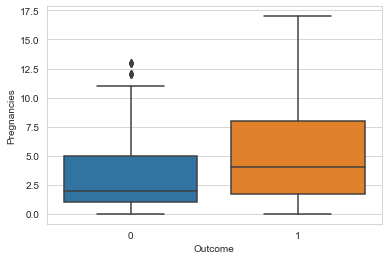

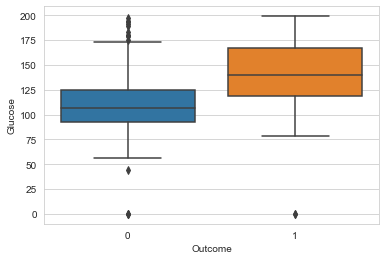

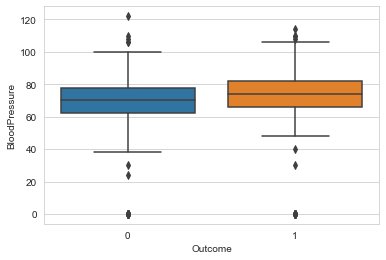

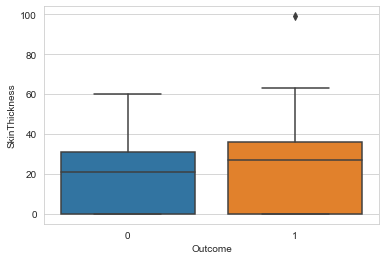

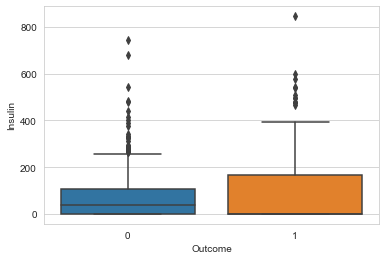

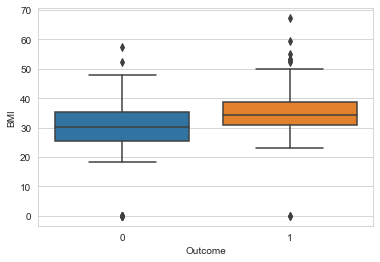

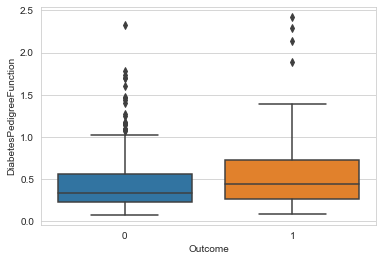

In [4]:
#visualize class separation by numeric values
def plot_box(diabetes, cols, col_x = 'Outcome'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=diabetes)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['Pregnancies', 'Glucose', 'BloodPressure',
            'SkinThickness', 'Insulin', 'BMI',
           'DiabetesPedigreeFunction']
plot_box(diabetes, num_cols)

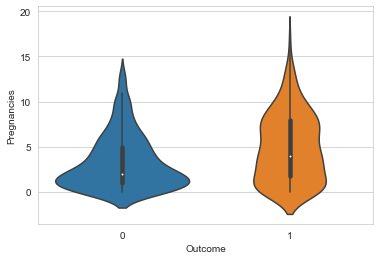

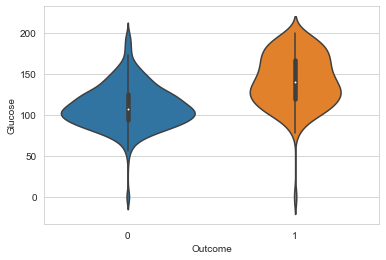

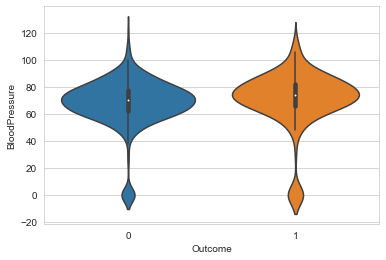

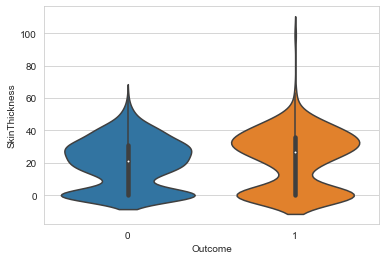

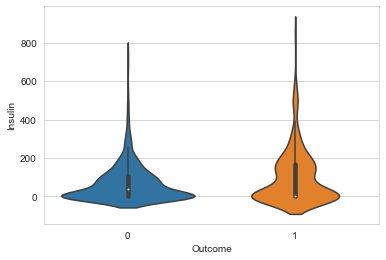

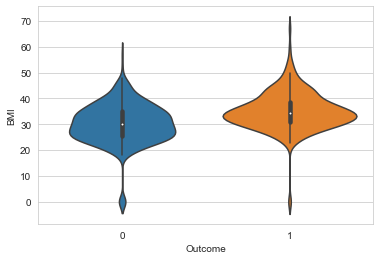

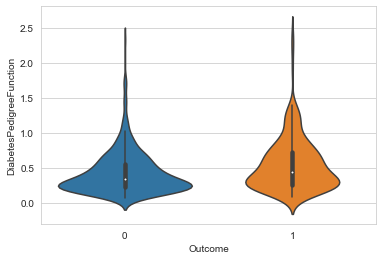

In [5]:
#violin plots to examine separation of label cases by by numeric features
def plot_violin(diabetes, cols, col_x = 'Outcome'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data=diabetes)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_violin(diabetes, num_cols)

#DATA CLEANING AND PREPARATION

In [6]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#printing shape
diabetes.shape

(768, 9)

In [8]:
#check for missing values
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#print data types
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
(diabetes.astype(np.object) == 0).any()

Pregnancies                  True
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                      True
dtype: bool

its not possible for teh following columns to be 0
*Glucose
*BloodPressure
*SkinThickness
*Insulin
*BMI
so the rows containing 0's have to be deleted

In [11]:
(diabetes.astype(np.object) == 0).any()

Pregnancies                  True
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                      True
dtype: bool

In [12]:
for col in diabetes.columns:
    if diabetes[col].dtype == object:
        count = 0
        count = [count + 1 for x in diabetes[col] if x == 0]
        print(col + ' ' + str(sum(count)))

In [13]:
#remove rows with 0's
## Drop column with too many missing values
#diabetes.drop('normalized_losses', axis = 1, inplace = True)
## Remove rows with missing values, accounting for mising values coded as '?'
cols = ['Glucose', 'BloodPressure', 'SkinThickness',
          'Insulin', 'BMI']
for column in cols:
    diabetes.loc[diabetes[column] == 0, column] = np.nan
diabetes.dropna(axis = 0, inplace = True)
diabetes.shape  

(392, 9)

In [14]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
19,1,115.0,70.0,30.0,96.0,34.6,0.529,32,1
20,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0


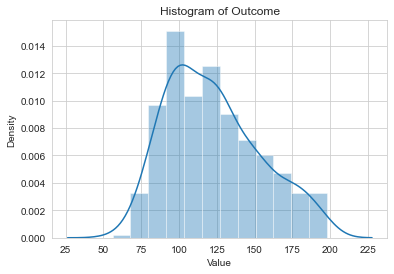

In [15]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')


#labels = np.array(auto_prices['price'])
hist_plot(diabetes['Glucose'], 'Outcome')

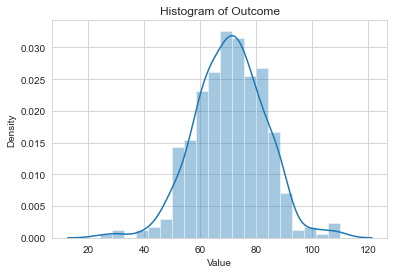

In [16]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(diabetes['BloodPressure'], 'Outcome')

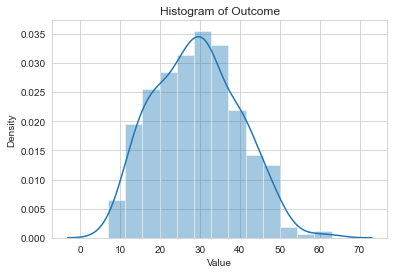

In [17]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(diabetes['SkinThickness'], 'Outcome')

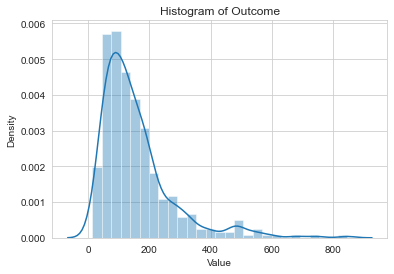

In [18]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(diabetes['Insulin'], 'Outcome')

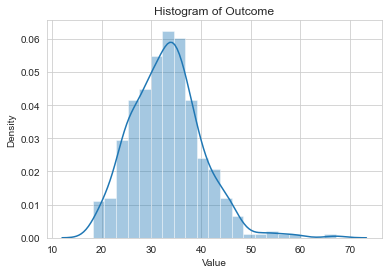

In [19]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(diabetes['BMI'], 'Outcome')

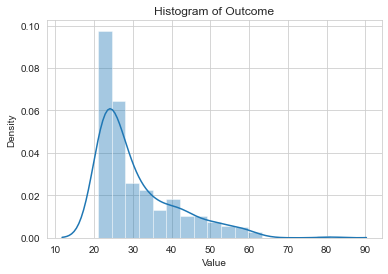

In [20]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(diabetes['Age'], 'Outcome')

PREPARE DATA FOR MACHINE LEARNING


In [21]:
labels = np.array(diabetes['Outcome'])

In [22]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
diabetes['log_Glucose'] = np.log(diabetes['Glucose'])
diabetes['log_Insulin'] = np.log(diabetes['Insulin'])
diabetes['log_BMI'] = np.log(diabetes['BMI'])
diabetes['log_Age'] = np.log1p(diabetes['Age'])
diabetes['log_BloodPressure'] = np.log(diabetes['BloodPressure'])
diabetes['log_SkinThickness'] = np.log(diabetes['SkinThickness'])


In [24]:
Features = np.concatenate([np.array(diabetes[['Pregnancies', 'log_Glucose', 
                            'log_Insulin', 'log_BMI','log_Age','log_BloodPressure',
                                             'log_SkinThickness']])], axis = 1)
print(Features.shape)
print(Features[:2, :])   

(392, 7)
[[1.         4.48863637 4.54329478 3.33576958 3.09104245 4.18965474
  3.13549422]
 [0.         4.91998093 5.12396398 3.763523   3.52636052 3.68887945
  3.55534806]]


In [25]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.3)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [27]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)

LogisticRegression()

In [28]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-26.81988165]
[[0.06311267 2.36658717 0.35561473 1.30573064 1.5873738  0.09473003
  0.68278564]]


In [29]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.6662419  0.3337581 ]
 [0.87916504 0.12083496]
 [0.74911344 0.25088656]
 [0.28442427 0.71557573]
 [0.73689379 0.26310621]
 [0.78724595 0.21275405]
 [0.75902717 0.24097283]
 [0.66211251 0.33788749]
 [0.55936713 0.44063287]
 [0.81950606 0.18049394]
 [0.27815695 0.72184305]
 [0.22369726 0.77630274]
 [0.78831037 0.21168963]
 [0.83206578 0.16793422]
 [0.69399814 0.30600186]]


SCORE AND EVALUATE THE MODEL

In [30]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[0 0 0 1 0 0 0 0 0 0 1 1 0 0 0]
[0 0 0 1 0 0 1 0 1 0 1 0 0 0 0]


In [31]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive        67                 8
Actual negative        19                24

Accuracy  0.77
 
           Positive      Negative
Num case       75            43
Precision    0.78          0.75
Recall       0.89          0.56
F1           0.83          0.64


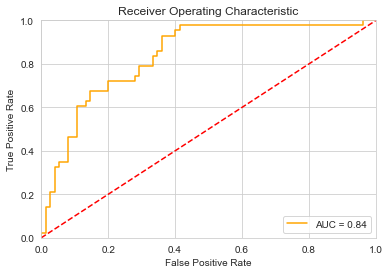

In [32]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)  

COMPUTE A WEIGHTED MODEL

In [33]:
logistic_mod = linear_model.LogisticRegression(class_weight = {0:0.45, 1:0.55}) 
logistic_mod.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.45, 1: 0.55})

In [34]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.61983836 0.38016164]
 [0.84009252 0.15990748]
 [0.69349524 0.30650476]
 [0.30153096 0.69846904]
 [0.68848586 0.31151414]
 [0.73234526 0.26765474]
 [0.70145856 0.29854144]
 [0.55852136 0.44147864]
 [0.53822567 0.46177433]
 [0.75480123 0.24519877]
 [0.3193235  0.6806765 ]
 [0.20159004 0.79840996]
 [0.71833152 0.28166848]
 [0.77515797 0.22484203]
 [0.64589819 0.35410181]]


                 Confusion matrix
                 Score positive    Score negative
Actual positive        64                11
Actual negative        14                29

Accuracy  0.79
 
           Positive      Negative
Num case       75            43
Precision    0.82          0.72
Recall       0.85          0.67
F1           0.84          0.70


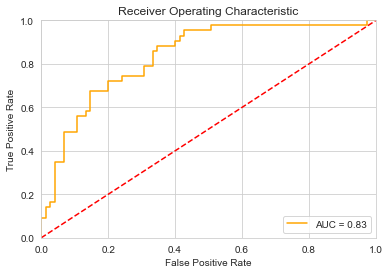

In [35]:
scores = score_model(probabilities, 0.45)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities)  

LOOK FOR A BETTER THRESHOLD

In [36]:
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

thresholds = [0.45, 0.40, 0.35, 0.3, 0.25]
for t in thresholds:
    test_threshold(probabilities, y_test, t)


For threshold = 0.45
                 Confusion matrix
                 Score positive    Score negative
Actual positive        64                11
Actual negative        14                29

Accuracy  0.79
 
           Positive      Negative
Num case       75            43
Precision    0.82          0.72
Recall       0.85          0.67
F1           0.84          0.70

For threshold = 0.4
                 Confusion matrix
                 Score positive    Score negative
Actual positive        58                17
Actual negative        12                31

Accuracy  0.75
 
           Positive      Negative
Num case       75            43
Precision    0.83          0.65
Recall       0.77          0.72
F1           0.80          0.68

For threshold = 0.35
                 Confusion matrix
                 Score positive    Score negative
Actual positive        51                24
Actual negative         9                34

Accuracy  0.72
 
           Positive      Negative
Num cas